# Generators and Eigen-values

Consider the continuous-time Markov chain $(X_t : t ≥ 0)$ with generator $G=\left( \begin{array}{ccc}-2&1&1\\1 &-4&3\\0&1&-1\\ \end{array}\right)$.

$\langle\pi_t|=\langle\pi_0|P_t$ with $P_t=\exp(tG)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make plots appear inline
%matplotlib inline 

plt.rcParams['figure.figsize'] = (12, 12) # set default size of plots
plt.rcParams.update({'font.size': 18}) # set default font size

Define G

In [5]:
G=np.array([[-2,1,1],[1,-4,3],[0,1,-1]]) #define G
print(G)

[[-2  1  1]
 [ 1 -4  3]
 [ 0  1 -1]]


In [6]:
def plot_circle(center,radius): # Function to plot a circle
    x=np.linspace(-1,1,500)
    x*=radius
    x+=center
    y=np.sqrt(radius**2-(x-center)**2)
    plt.plot(x,y,'r-',lw=3)
    plt.plot(x,-1*y,'r-',lw=3)

Find disks and eigen-values

In [7]:
centers=[] # find disks and also eigenstuff
radii=[]

N=3
for i in range(N):
    centers.append(G[i,i])
    temp=0.0
    for j in range(N):
        if j!=i:
            temp+=G[i,j]
    radii.append(temp)

evals,evecs=np.linalg.eig(G)

Plot it!

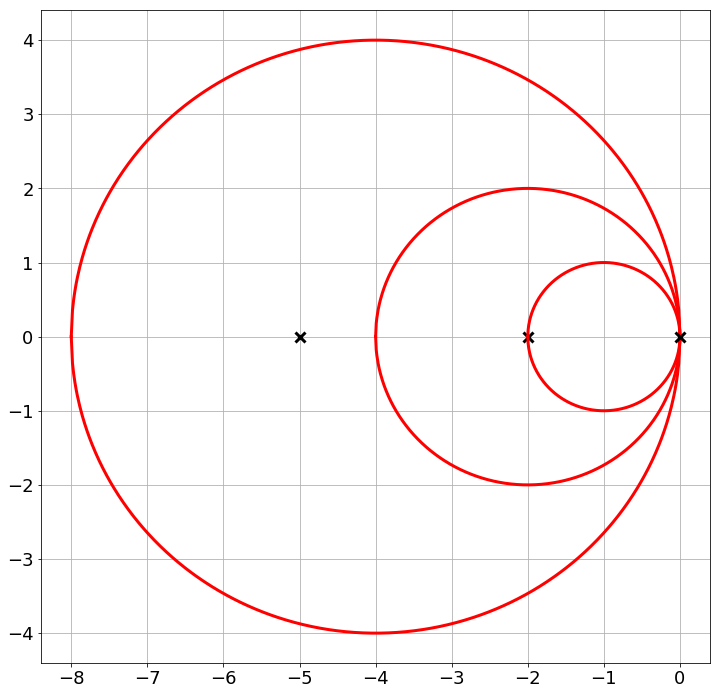

In [8]:
for i in range(N):
    plot_circle(centers[i],radii[i]) # Plot disk i
    plt.plot(np.real(evals[i]),np.imag(evals[i]),'kx',mew=3,ms=10) # Plot evalue i
# lim=1.1
# plt.xlim(-lim,lim)
# plt.ylim(-lim,lim)
plt.grid()

The disk theorem tells us that the eigen-values of $G$ all have real part $<0$. The stationary distribution corresponds to the eigen-value $\lambda=0$. $P_t$ and $G$ share eigen-vectors. Eigen-values are related as:

$\langle u| G = \lambda \langle u|$ $\to$ $\langle u| P_t = e^{\lambda t}\langle u| $

So $\langle u| P_t = \langle u| $ $\to$ $\lambda=0$.



In [12]:
# Take matrix expontential

from scipy import linalg as la # import package

t=0
P_t=la.expm(t*G)

print(P_t)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Now examine $P_t$ as a function of time $t$

In [10]:
# Get P_t as function of time

dt=0.1 # time step

t=np.arange(0,10,dt) #times
n_steps=np.shape(t)[0]


P_t=np.zeros((n_steps,3,3)) #initialize
for i in range(n_steps): # do it!
    time=t[i]
    P_t[i,:,:]=la.expm(time*G)
    
first_row=P_t[:,0,:]
print(np.shape(first_row))

(100, 3)


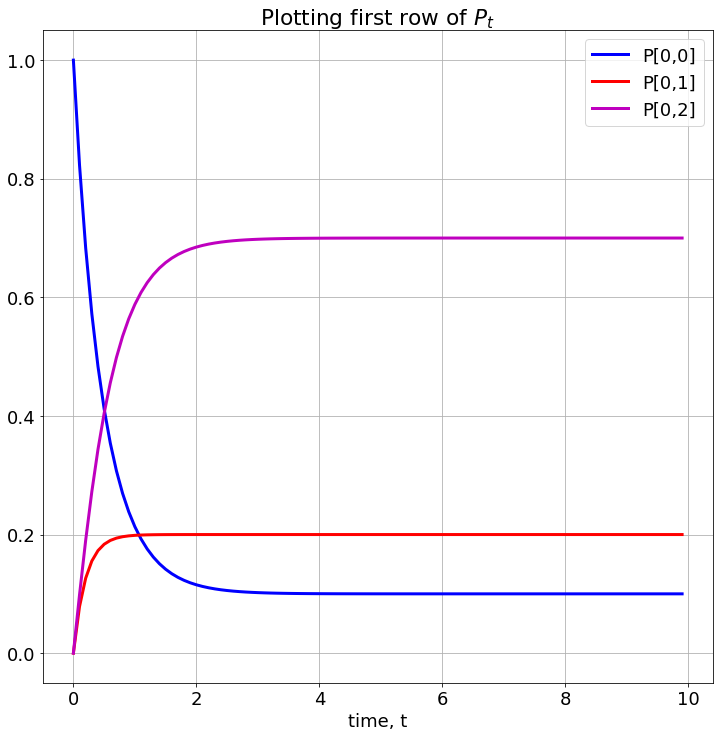

In [11]:
# Plot!

plt.plot(t,first_row[:,0],'b',lw=3,label='P[0,0]')
plt.plot(t,first_row[:,1],'r',lw=3,label='P[0,1]')
plt.plot(t,first_row[:,2],'m',lw=3, label='P[0,2]')
plt.grid()
plt.title(r'Plotting first row of $P_t$')
plt.xlabel(r'time, t')
plt.legend(loc='upper right')